In [171]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

In [172]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


# Merging both data sets

In [173]:
data_1 = pd.read_csv('/content/drive/MyDrive/MPD Analysis/Stop Data_01012020-03142020 (Part 1 of 2).csv')
data_2 = pd.read_csv('/content/drive/MyDrive/MPD Analysis/Stop Data_03152020-06302020 (Part 2 of 2).csv')

In [174]:
data_full = data_1.append(data_2)

In [175]:
data_full.head()

ccn_anonymized  ... arrest_date
0  0x4729AA6B2053B39F1E5CCB5A67ED9696803B7B5C2933...  ...         NaN
1  0xB8CDC60EB7DB33A3E15D2224F3FDD30F16EC8246332A...  ...         NaN
2  0x6CF7EBCB02602BC9309A4C976F2F90945E52547B9A7C...  ...         NaN
3  0xE0825914E27A3BB3739D9B9012C532008715E98BC734...  ...         NaN
4  0x9B68A6F6A3F3F3A03B3445F6C7B24AC3CE60E30E5C51...  ...    1/9/2020

[5 rows x 51 columns]

Interesting note is that there are stops in which up to 14 people are involved 

In [176]:
data_full['Count'] = data_full.groupby('ccn_anonymized')['ccn_anonymized'].transform('count')

In [177]:
data_full[data_full['Count'] == 14]

ccn_anonymized  ... Count
5763  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5777  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5779  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5799  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5802  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5806  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5815  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5816  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5818  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5820  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5824  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5825  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5827  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0
5829  0xDDCC57799F4C22969BBF33AE3F97B95DE7C9ACC95942...  ...  14.0

[14 rows x 52 columns]

Racial count of group stops

In [178]:
data_full[data_full['Count'] > 4]['race_ethnicity'].value_counts()

Black       899
White       145
Hispanic    142
Unknown      29
Asian         9
Other         1
Multiple      1
Name: race_ethnicity, dtype: int64

# Cleaning the data and picking relevant features

In [179]:
data_full.isna().sum()

ccn_anonymized                                  26325
stop_type                                           0
stop_date                                           0
stop_time                                         231
stop_location_block                                 8
stop_district                                      49
stop_duration_minutes                             315
stop_reason_nonticket                           26326
stop_reason_harbor                              47605
stop_reason_ticket                              20518
person_search_or_protective_pat_down                0
property_search_or_protective_pat_down              0
person_search_consent                               0
person_search_probable_cause                        0
person_protective_pat_down                          0
person_search_warrant                               0
property_search_consent                             0
property_search_probable_cause                      0
property_protective_pat_down

In [180]:
data_full.columns.values

array(['ccn_anonymized', 'stop_type', 'stop_date', 'stop_time',
       'stop_location_block', 'stop_district', 'stop_duration_minutes',
       'stop_reason_nonticket', 'stop_reason_harbor',
       'stop_reason_ticket', 'person_search_or_protective_pat_down',
       'property_search_or_protective_pat_down', 'person_search_consent',
       'person_search_probable_cause', 'person_protective_pat_down',
       'person_search_warrant', 'property_search_consent',
       'property_search_probable_cause', 'property_protective_pat_down',
       'property_search_warrant', 'person_search_reason_consent',
       'person_search_reason_probable_cause',
       'person_protective_pat_down_reason',
       'person_search_reason_warrant', 'property_search_reason_consent',
       'property_search_reason_probable_cause',
       'property_protective_pat_down_reason',
       'property_search_reason_warrant', 'property_search_object_consent',
       'property_search_object_probable_cause',
       'property_pro

In [181]:
data_full.drop(['person_search_reason_consent',
       'person_search_reason_probable_cause',
       'person_protective_pat_down_reason',
       'person_search_reason_warrant', 'property_search_reason_consent',
       'property_search_reason_probable_cause',
       'property_protective_pat_down_reason',
       'property_search_reason_warrant', 'property_search_object_consent',
       'property_search_object_probable_cause',
       'property_protective_pat_down_object',
       'property_search_object_warrant',
       'person_search_object_seized_consent',
       'person_search_object_seized_probable_cause',
       'person_protective_pat_down_object_seized',
       'person_search_object_seized_warrant',
       'property_search_object_seized_consent',
       'property_search_object_seized_probable_cause',
       'property_protective_pat_down_object_seized',
       'property_search_object_seized_warrant', 'tickets_issued',
       'warnings_issued', 'voided_tickets', 'ticket_count',
       'warning_count', 'void_count'], axis =1, inplace=True)

In [182]:
data_full.dropna(subset=['stop_district','stop_time','stop_duration_minutes','race_ethnicity'], inplace=True)

In [183]:
data_full.isna().sum()

ccn_anonymized                            24645
stop_type                                     0
stop_date                                     0
stop_time                                     0
stop_location_block                           5
stop_district                                 0
stop_duration_minutes                         0
stop_reason_nonticket                     24646
stop_reason_harbor                        46043
stop_reason_ticket                        20181
person_search_or_protective_pat_down          0
property_search_or_protective_pat_down        0
person_search_consent                         0
person_search_probable_cause                  0
person_protective_pat_down                    0
person_search_warrant                         0
property_search_consent                       0
property_search_probable_cause                0
property_protective_pat_down                  0
property_search_warrant                       0
arrest_charges                          

In [184]:
data_full = data_full[data_full['age']!='Unknown']

In [185]:
data_full['age'].replace('Juvenile',15, inplace=True)

In [186]:
data_full['age']=data_full['age'].map(int)

In [187]:
data_full.describe().transpose()

count       mean  ...   75%    max
stop_duration_minutes                   45389.0  14.934874  ...  15.0  360.0
person_search_or_protective_pat_down    45389.0   0.142964  ...   0.0    1.0
property_search_or_protective_pat_down  45389.0   0.046818  ...   0.0    1.0
person_search_consent                   45389.0   0.035669  ...   0.0    1.0
person_search_probable_cause            45389.0   0.032673  ...   0.0    1.0
person_protective_pat_down              45389.0   0.066139  ...   0.0    1.0
person_search_warrant                   45389.0   0.009386  ...   0.0    1.0
property_search_consent                 45389.0   0.021106  ...   0.0    1.0
property_search_probable_cause          45389.0   0.016171  ...   0.0    1.0
property_protective_pat_down            45389.0   0.005618  ...   0.0    1.0
property_search_warrant                 45389.0   0.003966  ...   0.0    1.0
age                                     45389.0  35.804578  ...  45.0   89.0
Count                                   20855.0   1.813906  ...   2.0   14.0

[13 rows x 8 columns]

In [188]:
(data_full['age']==15).sum()

1999

In [189]:
cont_features=[i for i in data_full.columns if data_full[i].nunique()>10]
cat_features=[i for i in data_full.columns if data_full[i].nunique()<=10]

In [190]:
cont_features

['ccn_anonymized',
 'stop_date',
 'stop_time',
 'stop_location_block',
 'stop_duration_minutes',
 'stop_reason_nonticket',
 'arrest_charges',
 'age',
 'arrest_date',
 'Count']

In [191]:
cat_features

['stop_type',
 'stop_district',
 'stop_reason_harbor',
 'stop_reason_ticket',
 'person_search_or_protective_pat_down',
 'property_search_or_protective_pat_down',
 'person_search_consent',
 'person_search_probable_cause',
 'person_protective_pat_down',
 'person_search_warrant',
 'property_search_consent',
 'property_search_probable_cause',
 'property_protective_pat_down',
 'property_search_warrant',
 'gender',
 'race_ethnicity']

In [192]:
data_full['race_ethnicity'].value_counts()

Black       35295
White        5651
Hispanic     3208
Asian         732
Unknown       325
Multiple      138
Other          40
Name: race_ethnicity, dtype: int64

In [193]:
data_full['race_ethnicity'].replace(['Unknown','Multiple'],'Other',inplace=True )

In [194]:
data_full['race_ethnicity'].value_counts()

Black       35295
White        5651
Hispanic     3208
Asian         732
Other         503
Name: race_ethnicity, dtype: int64

In [195]:
data_adults = data_full[data_full['age']>15]
data_juveniles = data_full[data_full['age']==15]

In [196]:
data_adultsxrace = data_adults.groupby('race_ethnicity')

In [197]:
fig = px.histogram(data_adults, x ='age',histnorm='probability density',color='race_ethnicity', title='Adult Stop Age PDF by Race', marginal='box')
fig.show()

In [198]:
fig = px.histogram(data_adults, x ='stop_duration_minutes',histnorm='probability density',
                   color='race_ethnicity', title='Adult Stop Duration (in mins) Distribution by Race')
fig.show()

In [199]:
q = data_adults['stop_duration_minutes'].quantile(0.99)
data_adults_outliers = data_adults[data_adults['stop_duration_minutes']>=q]

data_adults_noout = data_adults[(data_adults['age']<q) & (data_adults['stop_duration_minutes']<q)]


In [200]:
fig = px.histogram(data_adults_noout, x ='stop_duration_minutes',histnorm='probability density',
                   color='race_ethnicity', title='Stop Duration (in mins) Distribution by Race')
fig.show()

In [201]:
q = data_juveniles['stop_duration_minutes'].quantile(0.99)
data_juveniles_noout = data_juveniles[data_juveniles['stop_duration_minutes']<q]
data_juveniles_outliers = data_juveniles[data_juveniles['stop_duration_minutes']>=q]

In [202]:
fig = px.histogram(data_juveniles_noout, x ='stop_duration_minutes',histnorm='probability density',color='race_ethnicity', title='Juvenile Stop Duration Distribution by Race', marginal='rug')
fig.show()

In [203]:
data_adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43390 entries, 4 to 21035
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ccn_anonymized                          18922 non-null  object 
 1   stop_type                               43390 non-null  object 
 2   stop_date                               43390 non-null  object 
 3   stop_time                               43390 non-null  object 
 4   stop_location_block                     43387 non-null  object 
 5   stop_district                           43390 non-null  object 
 6   stop_duration_minutes                   43390 non-null  float64
 7   stop_reason_nonticket                   18921 non-null  object 
 8   stop_reason_harbor                      0 non-null      object 
 9   stop_reason_ticket                      25679 non-null  object 
 10  person_search_or_protective_pat_down    43390 non-null  in

In [204]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [205]:
pip install pingouin

In [206]:
import pingouin as pg
pg.homoscedasticity(data_adults_noout, dv='age', group='race_ethnicity')

W          pval  equal_var
levene  21.325385  1.363698e-17      False

In [207]:
m_comp = pairwise_tukeyhsd(endog=data_adults_noout['age'], groups=data_adults_noout['race_ethnicity'], alpha=0.05)
print(m_comp)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
   Asian    Black  -3.8663  0.001 -5.1818 -2.5509   True
   Asian Hispanic  -5.0355  0.001 -6.4838 -3.5871   True
   Asian    Other  -4.0222  0.001 -6.0582 -1.9863   True
   Asian    White  -0.2602    0.9 -1.6445   1.124  False
   Black Hispanic  -1.1691  0.001 -1.8324 -0.5058   True
   Black    Other  -0.1559    0.9  -1.733  1.4212  False
   Black    White   3.6061  0.001  3.0978  4.1144   True
Hispanic    Other   1.0132 0.4752 -0.6763  2.7028  False
Hispanic    White   4.7752  0.001  3.9842  5.5662   True
   Other    White    3.762  0.001   2.127  5.3969   True
--------------------------------------------------------


In [208]:
pg.homoscedasticity(data_adults_noout, dv='age', group='stop_district')

W          pval  equal_var
levene  60.191702  1.313760e-74      False

In [209]:
m_comp = pairwise_tukeyhsd(endog=data_adults_noout['age'], groups=data_adults_noout['stop_district'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    1D     2D   2.1056  0.001  1.4154  2.7959   True
    1D     3D  -0.2305    0.9 -0.9078  0.4468  False
    1D     4D  -0.5095 0.4344 -1.2709  0.2519  False
    1D     5D  -0.1326    0.9 -0.8239  0.5586  False
    1D     6D  -0.4794 0.2966 -1.1224  0.1637  False
    1D     7D  -3.5466  0.001 -4.2569 -2.8364   True
    2D     3D  -2.3361  0.001 -2.9985 -1.6737   True
    2D     4D  -2.6151  0.001 -3.3634 -1.8669   True
    2D     5D  -2.2383  0.001 -2.9149 -1.5616   True
    2D     6D   -2.585  0.001 -3.2124 -1.9576   True
    2D     7D  -5.6523  0.001 -6.3484 -4.9562   True
    3D     4D   -0.279    0.9 -1.0153  0.4572  False
    3D     5D   0.0979    0.9 -0.5656  0.7613  False
    3D     6D  -0.2489 0.8956  -0.862  0.3642  False
    3D     7D  -3.3162  0.001 -3.9994 -2.6329   True
    4D     5D   0.3769 0.7272 -0.3722   1.126 

## Redoing the earlier mean difference analysis with the Welchs test

In [210]:
from pingouin import welch_anova, read_dataset

In [211]:
aov = welch_anova(data_adults_noout,dv='age',between='race_ethnicity')
aov

Source  ddof1        ddof2           F         p-unc       np2
0  race_ethnicity      4  2100.772786  112.705957  3.834179e-87  0.011079

In [212]:
aov = welch_anova(data_adults_noout,dv='age',between='stop_district')
aov

Source  ddof1        ddof2           F          p-unc       np2
0  stop_district      6  17940.14124  106.509147  2.117648e-132  0.013572

This seems to confirm the earlier Turkey test in there being significant differences between the means. However, given the unequal group sizes and unequal variances, the precise numbers should be taken with a teaspoon of salt.

### Time to GEOPLOT!!!!

In [213]:
pip install geopandas

In [214]:
import geopandas as gp

In [215]:
districts_geo = gp.read_file('/content/drive/MyDrive/MPD Analysis/Police Districts Geo/Police_Districts.shp')

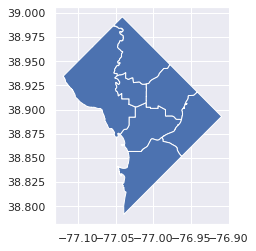

In [216]:
districts_geo.plot()

In [217]:
data_adultsxdistrict = data_adults_noout.groupby('stop_district')

In [218]:
data_adultsxdistrict

In [219]:
districts_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   7 non-null      int64   
 1   DISTRICT   7 non-null      int64   
 2   WEB_URL    7 non-null      object  
 3   GIS_ID     7 non-null      object  
 4   NAME       7 non-null      object  
 5   SHAPEAREA  7 non-null      int64   
 6   SHAPELEN   7 non-null      int64   
 7   geometry   7 non-null      geometry
dtypes: geometry(1), int64(4), object(3)
memory usage: 576.0+ bytes


In [220]:
data_adultsxdistrict.mean()

stop_duration_minutes  ...     Count
stop_district                         ...          
1D                         13.530627  ...  1.576529
2D                         13.000983  ...  1.883457
3D                         12.421235  ...  2.065895
4D                         15.215033  ...  1.802315
5D                         13.946787  ...  1.538129
6D                         13.157633  ...  1.695161
7D                         14.047067  ...  1.619568

[7 rows x 13 columns]

In [221]:
mean_stop_durationxdistrict = data_adultsxdistrict['stop_duration_minutes'].mean()
districts_geo['stop_duration_mean'] = mean_stop_durationxdistrict.values

In [222]:
districts_geo.set_index('DISTRICT', inplace=True)

In [223]:
fig = px.choropleth(districts_geo,geojson=districts_geo.geometry, locations=districts_geo.index,
                    color='stop_duration_mean',projection='mercator',
                    color_continuous_scale=px.colors.sequential.Magenta,
                    title='Average MPD Stop Time of Adults by district')

fig.update_geos(fitbounds="locations", visible=False)


In [224]:
px.histogram(data_adults,x='race_ethnicity',histfunc='count',
             labels={'race_ethnicity':'Race'},
             title='Count of MPD Stops of Adults by Race')

In [225]:
px.pie(data_adults,names='race_ethnicity', 
       color_discrete_sequence=px.colors.qualitative.Prism,
       labels={'race_ethnicity':'Race'},
       title='MPD Stops of Adults by Race (%)')

In [226]:
px.histogram(data_adults_noout,x='age',y='stop_duration_minutes',histfunc='avg',
             labels={'stop_duration_minutes' : 'Stop Duration (mins)'})

In [227]:
data_fullxdistricts = data_full.groupby('stop_district')

In [228]:
mean_agebydistrict_adult = data_adultsxdistrict['age'].mean()
districts_geo['mean age'] = mean_agebydistrict_adult.values

In [229]:
fig = px.choropleth(districts_geo,geojson=districts_geo.geometry, locations=districts_geo.index,
                    color='mean age',projection='mercator',
                    color_continuous_scale=px.colors.sequential.Magenta,
                    title='Average Age of Adults Stopped by district')

fig.update_geos(fitbounds="locations", visible=False)


In [230]:
data_juvenilesbydistrict = data_juveniles.groupby('stop_district')

In [231]:
count_juvibydistrict = data_juvenilesbydistrict.count()
districts_geo['juvi'] = count_juvibydistrict['stop_date'].values

In [232]:
fig = px.choropleth(districts_geo,geojson=districts_geo.geometry, locations=districts_geo.index,
                    color='juvi',projection='mercator',
                    labels={'juvi':'count'},
                    color_continuous_scale=px.colors.sequential.Magenta,
                    title='Count of Children (<18) Stopped by District',)

fig.update_geos(fitbounds="locations", visible=False)

In [233]:
districts_geo['Personal Patdown'] = data_adultsxdistrict['person_search_or_protective_pat_down'].sum().values

In [234]:
districts_geo

OBJECTID  ... Personal Patdown
DISTRICT            ...                 
1                1  ...              870
2                2  ...              371
3                3  ...              571
4                4  ...              613
5                5  ...              641
6                6  ...             1143
7                7  ...             1384

[7 rows x 11 columns]

In [235]:
pip install dash

In [ ]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

In [236]:
pip install jupyter-dash

In [ ]:
from jupyter_dash import JupyterDash

In [237]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Dropdown(
        id='dropdown',
        options=[
            {'label': 'Children (<18) Stopped by MPD', 'value': 'juvi'},
            {'label': 'Average Age of Adults Stopped', 'value': 'mean age'},
            {'label': 'Personal Patdowns or Searches', 'value': 'Personal Patdown'},
        ],
        searchable=False,
        value='Personal Patdown'
    ),
    html.Div(id='dd-output-container'),
    html.Br(),
    dcc.Graph(id='DC map')
])


@app.callback(
    [Output('dd-output-container', 'children'), Output('DC map','figure')],
    [Input('dropdown', 'value')])

def update_output(value):
  container = 'You have selected the feature "{}"'.format(value)

  if value =='juvi':
    labels = {'juvi':'count'}
  elif(value=='mean age'):
    labels ={'mean age': 'Average'}
  elif(value=='Personal Patdown'):
   labels = {'Personal Patdown': 'count'}

  fig = px.choropleth(districts_geo,geojson=districts_geo.geometry, locations=districts_geo.index,
                    color=value,projection='mercator', labels=labels,
                    color_continuous_scale=px.colors.sequential.Magenta)
  fig.update_geos(fitbounds="locations", visible=False)

  return container, fig

In [238]:
app.run_server(mode='inline',debug = False)

127.0.0.1 - - [02/Jun/2021 20:21:25] "GET /_shutdown_276a63f6-9b63-45ae-9f77-0c4bf4b6d146 HTTP/1.1" 200 -
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [02/Jun/2021 20:21:25] "GET /_alive_276a63f6-9b63-45ae-9f77-0c4bf4b6d146 HTTP/1.1" 200 -


<IPython.core.display.Javascript object>